In [43]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.tokenize import sent_tokenize, word_tokenize

from collections import defaultdict
import matplotlib.pyplot as plt

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\weiti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\weiti\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\weiti\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [44]:
article = open('article.txt', 'r').read()

In [45]:
# Tokenize the article into sentences: sentences
sentences = nltk.sent_tokenize(article)

# Tokenize each sentence into words: token_sentences
token_sentences = [nltk.word_tokenize(sent) for sent in sentences]

# Tag each tokenized sentence into parts of speech: pos_sentences
pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences] 

# Create the named entity chunks: chunked_sentences
chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary=True)

# Test for stems of the tree with 'NE' tags
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)


(NE System/NNP)
(NE Statistical/NNP Process/NNP Control/NNP)
(NE Mark/NNP)
(NE Admiral/NNP Grace/NNP Hopper/NNP)
(NE FOLDOC/NNP)
(NE Harvard/NNP Mark/NNP)
(NE Harvard/NNP University/NNP)
(NE Thomas/NNP Edison/NNP)
(NE Robert/NNP Oppenheimer/NNP)
(NE WWII/NNP)
(NE Los/NNP Alamos/NNP)
(NE UC/NNP Berkeley/NNP)
(NE Oxford/NNP English/NNP)
(NE Royal/NNP Aeronautical/NNP Society/NNP)
(NE GillS/NNP)
(NE Gill/NNP)
(NE Mistakes/NNP)
(NE EDSAC/NNP)
(NE Royal/NNP Society/NNP)
(NE London/NNP)
(NE Series/NNP A/NNP)
(NE Mathematical/NNP)
(NE Physical/NNP Sciences/NNPS)
(NE Vol/NNP)
(NE ACM/NNP National/NNP)
(NE John/NNP B./NNP Jackson/NNP)
(NE Edmund/NNP Klein/NNP)
(NE Walter/NNP Orvedahl/NNP)
(NE James/NNP)
(NE MANIAC/NNP)
(NE Toronto/NNP)
(NE Compatible/JJ)
(NE Compatible/NNP)
(NE Elusive/NNP Computer/NNP)
(NE Elusive/NNP Computer/NNP Bug/NNP)
(NE IEEE/NNP Annals/NNP)
(NE Java/NNP)
(NE Unix/NNP)
(NE BIOSes/NNP)
(NE ICEs/NNP)
(NE Parallel/NNP)
(NE BASIC/NNP)
(NE TRON/NNP)
(NE TRON/NNP)
(NE BASIC/NN

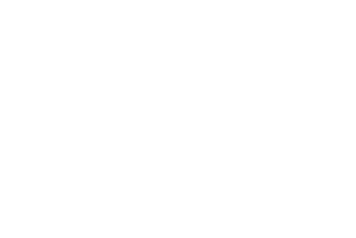

In [46]:
# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1
            
# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(l) for l in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()


# Introduction to SpaCy

### Why using SpaCy
* Easy pipeline creation
* Different entity types compared to nltk
* Informal language corpora
* * Easily find entities in Tweets and chat messages
* Quickly growing!

In [48]:
# Import spacy
import spacy

# Instantiate the English model: nlp
nlp = spacy.load('en', tagger=False, parser=False, matcher=False)

# Create a new document: doc
doc = nlp(article)

# Print all of the found entities and their labels
for ent in doc.ents:
    print(ent.label_, ent.text)


ModuleNotFoundError: No module named 'spacy'

# Multilingual NER with polyglot


## What is polyglot
* NLP library which uses word vectors

## Why polyglot?
* Vectors for many different languages
* More than 130!

In [51]:
from polyglot.text import Text

# Create a new text object using Polyglot's Text class: txt
txt = Text(article)

# Print each of the entities found
for ent in txt.entities:
    print(ent)
    
# Print the type of ent
print(type(ent))



ModuleNotFoundError: No module named 'polyglot'

## French NER with polyglot II


In [52]:
# Create the list of tuples: entities
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

# Print entities
print(entities)



NameError: name 'txt' is not defined